# Importing all dependencies

In [20]:
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

import numpy as np

from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!unzip "/content/drive/MyDrive/ml_speedrun/train.csv.zip"

unzip:  cannot find or open /content/drive/MyDrive/ml_speedrun/train.csv.zip, /content/drive/MyDrive/ml_speedrun/train.csv.zip.zip or /content/drive/MyDrive/ml_speedrun/train.csv.zip.ZIP.


In [22]:
### reading csv file

train = pd.read_csv("/content/train.csv")
train.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
0,1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,1.08947,-1.36048,-1.31529,0.36119,-0.62857,-1.65290,1.47167,-0.88741,-0.25942,-0.34414,-0.38914,0.38425,-0.50553,-0.09451,0.30568,-1.07570,-0.65924,1.10918,1.22234,-0.12479,0.50198,-0.63932,0.61505,1.16747,0.36921,-0.44398,0.46192,-0.83207,-0.74952,-0.40722,...,0.54072,-0.71995,1.11262,-0.11429,0.85618,0.17233,-1.06815,0.04569,-0.13031,2.07549,0.47934,0.69172,1.37139,0.45480,-0.96053,0.06319,0.09664,-0.34749,0.09889,-0.87606,0.82594,0.52841,0.84209,0.16771,0.59003,-0.22960,-0.04017,0.15554,-0.41569,0.68050,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
1,2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,-0.02842,-0.56431,0.42060,-0.47533,1.60025,-0.02106,-2.30193,-0.31614,-0.08050,0.85041,-0.10574,-0.33177,-1.32102,-0.22244,-0.52076,0.40012,-0.41339,-0.15176,1.02155,-0.52834,0.66718,0.54844,0.18323,0.28764,-0.80084,-0.85040,0.45097,0.88317,-1.13375,-1.85301,...,-0.25966,-1.19259,-0.71514,-0.08903,-0.58853,-0.20697,-0.77025,-1.21129,-0.67575,0.32509,-0.35147,-0.33581,-0.31505,-1.66721,0.40666,0.15053,-0.77809,0.35837,-1.10950,0.03764,-0.93728,-0.68952,-0.92334,-0.35401,-1.20552,1.10199,0.46268,0.85954,-0.48484,-0.54585,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
2,3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,-0.98205,0.67435,-1.27604,-1.37050,-0.91682,0.23617,0.53676,-0.26815,-0.66989,0.46076,-0.04117,1.34078,0.46545,-0.25943,-0.22918,-0.49346,-0.53558,0.69776,1.15477,0.01293,-0.86763,-0.08987,0.54660,0.09142,-0.21663,-0.28233,0.15426,-1.02164,-0.24342,-0.18844,...,0.91472,-0.29778,0.45507,0.03296,-0.79752,1.19759,-0.45417,0.15993,0.39516,-0.87621,0.05737,-0.99432,1.19910,0.78989,-0.13908,0.12384,0.38121,0.05699,-0.89445,-0.67448,-0.07669,-1.50409,0.07962,0.95116,0.72782,-0.88516,0.40735,0.10415,0.31639,-0.34801,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
3,4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,-0.04532,0.97349,-0.21032,-0.71143,0.59725,-0.51849,0.00126,1.22219,0.57160,0.41212,0.90077,-0.80797,-1.20564,1.40774,0.49080,-1.05429,0.26300,-0.03849,-0.66792,-0.29260,0.47713,0.44967,0.44411,-0.13465,-0.20365,0.52841,-0.47348,0.39295,0.67695,0.40861,...,0.65551,-0.17916,0.55700,1.84589,0.70722,-0.55871,-1.18265,0.82509,-0.50715,0.71948,-1.08462,-0.05607,0.86918,-0.11338,-0.73700,-0.12130,0.81417,-0.61391,-0.90671,1.09301,0.37716,1.06373,-0.62199,-0.21279,-0.43245,-0.28904,-0.25435,-0.20458,-0.00398,1.18449,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
4,5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,-0.88828,0.13601,0.26917,0.11973,0.04378,1.06879,0.10060,-0.83331,-0.64776,0.26461,0.65249,-0.41807,0.65920,0.11838,-0.00525,-0.74657,-0.97743,-0.71398,-0.08356,-0.82942,0.60474,0.12790,-0.41187,-2.18319,0.27367,0.54507,0.26555,0.67382,-0.24832,0.43397,...,0.90449,-0.51652,-0.11353,1.59131,-0.15053,-0.03551,0.02906,0.16957,0.62629,0.71465,-0.77525,0.46366,0.03279,-0.17744,0.32256,0.16237,-0.52918,-1.07961,0.55594,0.07770,0.08003,0.86164,0.24552,-0.17842,0.57825,0.01275,-1.05442,-0.61130,0.72826,-1.61306,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0


# Dropping null values

In [23]:
train.dropna(how='all') 

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
0,1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,1.08947,-1.36048,-1.31529,0.36119,-0.62857,-1.65290,1.47167,-0.88741,-0.25942,-0.34414,-0.38914,0.38425,-0.50553,-0.09451,0.30568,-1.07570,-0.65924,1.10918,1.22234,-0.12479,0.50198,-0.63932,0.61505,1.16747,0.36921,-0.44398,0.46192,-0.83207,-0.74952,-0.40722,...,0.54072,-0.71995,1.11262,-0.11429,0.85618,0.17233,-1.06815,0.04569,-0.13031,2.07549,0.47934,0.69172,1.37139,0.45480,-0.96053,0.06319,0.09664,-0.34749,0.09889,-0.87606,0.82594,0.52841,0.84209,0.16771,0.59003,-0.22960,-0.04017,0.15554,-0.41569,0.68050,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
1,2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,-0.02842,-0.56431,0.42060,-0.47533,1.60025,-0.02106,-2.30193,-0.31614,-0.08050,0.85041,-0.10574,-0.33177,-1.32102,-0.22244,-0.52076,0.40012,-0.41339,-0.15176,1.02155,-0.52834,0.66718,0.54844,0.18323,0.28764,-0.80084,-0.85040,0.45097,0.88317,-1.13375,-1.85301,...,-0.25966,-1.19259,-0.71514,-0.08903,-0.58853,-0.20697,-0.77025,-1.21129,-0.67575,0.32509,-0.35147,-0.33581,-0.31505,-1.66721,0.40666,0.15053,-0.77809,0.35837,-1.10950,0.03764,-0.93728,-0.68952,-0.92334,-0.35401,-1.20552,1.10199,0.46268,0.85954,-0.48484,-0.54585,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
2,3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,-0.98205,0.67435,-1.27604,-1.37050,-0.91682,0.23617,0.53676,-0.26815,-0.66989,0.46076,-0.04117,1.34078,0.46545,-0.25943,-0.22918,-0.49346,-0.53558,0.69776,1.15477,0.01293,-0.86763,-0.08987,0.54660,0.09142,-0.21663,-0.28233,0.15426,-1.02164,-0.24342,-0.18844,...,0.91472,-0.29778,0.45507,0.03296,-0.79752,1.19759,-0.45417,0.15993,0.39516,-0.87621,0.05737,-0.99432,1.19910,0.78989,-0.13908,0.12384,0.38121,0.05699,-0.89445,-0.67448,-0.07669,-1.50409,0.07962,0.95116,0.72782,-0.88516,0.40735,0.10415,0.31639,-0.34801,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
3,4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,-0.04532,0.97349,-0.21032,-0.71143,0.59725,-0.51849,0.00126,1.22219,0.57160,0.41212,0.90077,-0.80797,-1.20564,1.40774,0.49080,-1.05429,0.26300,-0.03849,-0.66792,-0.29260,0.47713,0.44967,0.44411,-0.13465,-0.20365,0.52841,-0.47348,0.39295,0.67695,0.40861,...,0.65551,-0.17916,0.55700,1.84589,0.70722,-0.55871,-1.18265,0.82509,-0.50715,0.71948,-1.08462,-0.05607,0.86918,-0.11338,-0.73700,-0.12130,0.81417,-0.61391,-0.90671,1.09301,0.37716,1.06373,-0.62199,-0.21279,-0.43245,-0.28904,-0.25435,-0.20458,-0.00398,1.18449,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
4,5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,-0.88828,0.13601,0.26917,0.11973,0.04378,1.06879,0.10060,-0.83331,-0.64776,0.26461,0.65249,-0.41807,0.65920,0.11838,-0.00525,-0.74657,-0.97743,-0.71398,-0.08356,-0.82942,0.60474,0.12790,-0.41187,-2.18319,0.27367,0.54507,0.26555,0.67382,-0.24832,0.43397,...,0.90449,-0.51652,-0.11353,1.59131,-0.15053,-0.03551,0.02906,0.16957,0.62629,0.71465,-0.77525,0.46366,0.03279,-0.17744,0.32256,0.16237,-0.52918,-1.07961,0.55594,0.07770,0.08003,0.86164,0.24552,-0.17842,0.57825,0.01275,-1.05442,-0.61130,0.72826,-1.61306,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [44]:
##spliiting features


X = train.drop(columns = ["glasses"])
Y = train["glasses"]

# Let's Observe the data

# Value of Variable X

In [25]:
X.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v473,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512
0,1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,1.08947,-1.36048,-1.31529,0.36119,-0.62857,-1.65290,1.47167,-0.88741,-0.25942,-0.34414,-0.38914,0.38425,-0.50553,-0.09451,0.30568,-1.07570,-0.65924,1.10918,1.22234,-0.12479,0.50198,-0.63932,0.61505,1.16747,0.36921,-0.44398,0.46192,-0.83207,-0.74952,-0.40722,...,-0.39096,0.54072,-0.71995,1.11262,-0.11429,0.85618,0.17233,-1.06815,0.04569,-0.13031,2.07549,0.47934,0.69172,1.37139,0.45480,-0.96053,0.06319,0.09664,-0.34749,0.09889,-0.87606,0.82594,0.52841,0.84209,0.16771,0.59003,-0.22960,-0.04017,0.15554,-0.41569,0.68050,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609
1,2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,-0.02842,-0.56431,0.42060,-0.47533,1.60025,-0.02106,-2.30193,-0.31614,-0.08050,0.85041,-0.10574,-0.33177,-1.32102,-0.22244,-0.52076,0.40012,-0.41339,-0.15176,1.02155,-0.52834,0.66718,0.54844,0.18323,0.28764,-0.80084,-0.85040,0.45097,0.88317,-1.13375,-1.85301,...,-1.33041,-0.25966,-1.19259,-0.71514,-0.08903,-0.58853,-0.20697,-0.77025,-1.21129,-0.67575,0.32509,-0.35147,-0.33581,-0.31505,-1.66721,0.40666,0.15053,-0.77809,0.35837,-1.10950,0.03764,-0.93728,-0.68952,-0.92334,-0.35401,-1.20552,1.10199,0.46268,0.85954,-0.48484,-0.54585,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496
2,3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,-0.98205,0.67435,-1.27604,-1.37050,-0.91682,0.23617,0.53676,-0.26815,-0.66989,0.46076,-0.04117,1.34078,0.46545,-0.25943,-0.22918,-0.49346,-0.53558,0.69776,1.15477,0.01293,-0.86763,-0.08987,0.54660,0.09142,-0.21663,-0.28233,0.15426,-1.02164,-0.24342,-0.18844,...,-0.65124,0.91472,-0.29778,0.45507,0.03296,-0.79752,1.19759,-0.45417,0.15993,0.39516,-0.87621,0.05737,-0.99432,1.19910,0.78989,-0.13908,0.12384,0.38121,0.05699,-0.89445,-0.67448,-0.07669,-1.50409,0.07962,0.95116,0.72782,-0.88516,0.40735,0.10415,0.31639,-0.34801,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982
3,4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,-0.04532,0.97349,-0.21032,-0.71143,0.59725,-0.51849,0.00126,1.22219,0.57160,0.41212,0.90077,-0.80797,-1.20564,1.40774,0.49080,-1.05429,0.26300,-0.03849,-0.66792,-0.29260,0.47713,0.44967,0.44411,-0.13465,-0.20365,0.52841,-0.47348,0.39295,0.67695,0.40861,...,-0.64236,0.65551,-0.17916,0.55700,1.84589,0.70722,-0.55871,-1.18265,0.82509,-0.50715,0.71948,-1.08462,-0.05607,0.86918,-0.11338,-0.73700,-0.12130,0.81417,-0.61391,-0.90671,1.09301,0.37716,1.06373,-0.62199,-0.21279,-0.43245,-0.28904,-0.25435,-0.20458,-0.00398,1.18449,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755
4,5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,-0.88828,0.13601,0.26917,0.11973,0.04378,1.06879,0.10060,-0.83331,-0.64776,0.26461,0.65249,-0.41807,0.65920,0.11838,-0.00525,-0.74657,-0.97743,-0.71398,-0.08356,-0.82942,0.60474,0.12790,-0.41187,-2.18319,0.27367,0.54507,0.26555,0.67382,-0.24832,0.43397,...,1.08390,0.90449,-0.51652,-0.11353,1.59131,-0.15053,-0.03551,0.02906,0.16957,0.62629,0.71465,-0.77525,0.46366,0.03279,-0.17744,0.32256,0.16237,-0.52918,-1.07961,0.55594,0.07770,0.08003,0.86164,0.24552,-0.17842,0.57825,0.01275,-1.05442,-0.61130,0.72826,-1.61306,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298


# Value of Y

In [26]:
Y.head()

0    0
1    1
2    1
3    0
4    0
Name: glasses, dtype: int64

### Data Visualization

In [27]:
import sklearn.model_selection as model_selection

train_x, test_x, train_y, test_y = model_selection.train_test_split(X, Y, shuffle=True, test_size=0.2, random_state = 3)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(3600, 513) (3600,) (900, 513) (900,)


## Let's see the values of images with glasses and with no glasses

Number of no-glass images 2856
Number of imges with images 1644


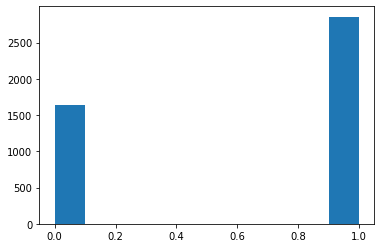

In [28]:
plt.hist(train["glasses"])
print("Number of no-glass images",np.count_nonzero(train["glasses"]))
print("Number of imges with images",len(train["glasses"])-np.count_nonzero(train["glasses"]))

### Using Random forest classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 7)  
  
clf1=clf.fit(train_x, train_y)

# Cross-Validation for random forest classifier

In [30]:
cv1=cross_val_score(clf1, X, Y,cv=5)
print("Cross Validation score for Random Forest Classifier is :",cv1)
print('Mean Value Error', cv1.mean())


Cross Validation score for Random Forest Classifier is : [0.85666667 0.86777778 0.86       0.82555556 0.85111111]
Mean Value Error 0.8522222222222222


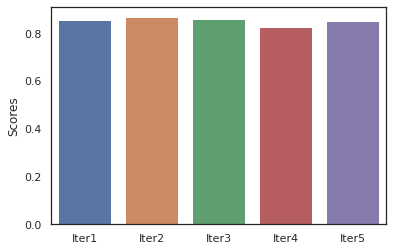

In [48]:
scores = pd.DataFrame(cv1,columns=['Scores'])
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()

# Let's Calclate the Accuracies for the Random Forest Classifier

In [31]:
# performing predictions on the test dataset
y_pred = clf.predict(test_x)
  
# metrics are used to find accuracy or error
from sklearn import metrics  

  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(test_y, y_pred))

ACCURACY OF THE MODEL:  0.8655555555555555


### Apply Prinicipal Component Analysis for dimensionality reduction

In [32]:
from sklearn.decomposition import PCA

pca = PCA(.90)

In [33]:
pca = PCA(n_components=256)
X_PCA = pca.fit(train_x).transform(train_x)

In [34]:
clf = RandomForestClassifier(n_estimators = 7)  
  
clf.fit(X_PCA, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Let's find the accuracies now after applying PCA

In [35]:
test_X_pca = pca.fit(test_x).transform(test_x)

# performing predictions on the test dataset
y_pred = clf.predict(test_X_pca)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(test_y, y_pred))


ACCURACY OF THE MODEL:  0.9322222222222222


### Let's apply Logistic regression on given dataset

In [36]:
from sklearn.linear_model import LogisticRegression
print()
clf2 = LogisticRegression(random_state=0).fit(train_x, train_y)
y_pred_lr = clf2.predict(test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Cross-Validation for Logistic Regression Model

In [37]:
cv2=cross_val_score(clf2, X, Y,cv=5)
print("Cross Validation score for Logistic Regression Model is :",cv2)
print('Mean Value Error', cv2.mean())


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross Validation score for Logistic Regression Model is : [0.92222222 0.96777778 0.98444444 0.98444444 0.98666667]
Mean Value Error 0.969111111111111


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


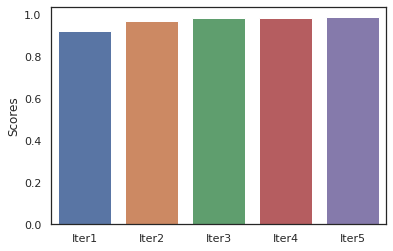

In [49]:
scores = pd.DataFrame(cv2,columns=['Scores'])
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()

Let's Calculate the accuracy for Logistic regression

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,y_pred_lr))

0.9744444444444444


# Apply LDA(Linear Discriminant Analysis) on given dataset

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

lda = LinearDiscriminantAnalysis(n_components=2)
clf3=lda.fit(train_x, train_y)
X_LDA = clf3.transform(train_x)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(513, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


# Cross-Validation for Linear Discriminant Analysis

In [40]:

cv3=cross_val_score(clf3, X, Y,cv=5)
print("Cross Validation score for Random Forest Classifier is :",cv3)
print('Mean Value Error', cv3.mean())



/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(513, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(513, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components

Cross Validation score for Random Forest Classifier is : [0.98666667 0.98555556 0.98777778 0.98555556 0.98444444]
Mean Value Error 0.986


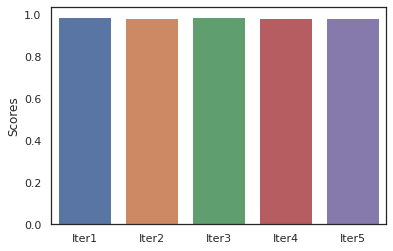

In [50]:
scores = pd.DataFrame(cv3,columns=['Scores'])
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()

In [41]:
Z = lda.transform(test_x) #using the model to project Z
z_labels = lda.predict(test_x) #gives you the predicted label for each sample
z_prob = lda.predict_proba(test_x) #the probability of each sample to belong to each class

In [42]:
import numpy as np

pred_lda = []

for i in z_prob:
  pred_lda.append(np.argmax(i))

pred_lda = np.array(pred_lda)

pred_lda.shape

(900,)

# Let's Calculatethe accuracy for the LDA

In [43]:
print(accuracy_score(test_y,pred_lda))

0.9822222222222222
